# RMSD Calculations

In [1]:
%load_ext autoreload
%autoreload 2

### requirments for Analytics class
- itertools
- pathlib
- os
- json
- pandas


In [2]:
from utils import Analytics as A
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (utils.py, line 52)

### dataframe & chart coloring
- if percent of conformations with RMSD <= 2.5 is greater than 5% - COLORING RED
- otherwise - COLORING GREEN

In [3]:
def _color_frame(val):
    color = 'green' if val > 0.05 else 'red'
    return 'color: %s' % color

In [4]:
def plot_chart(data:dict, title:str =None):    
    names = list(data.keys())
    values = list(data.values())
    colors = ['green' if v > 0.05 else 'red' for v in values]
    plt.bar(range(len(data)),values,tick_label=names, color=colors)
    if title is not None:
        plt.savefig(title)
    plt.show()

### paths to your sample sets

- do not use paths `rmsds/train/rmsds/..` and `rmsds/test/rmsds/..`


- use paths `rmsds/train/..` and `rmsds/test/..`

In [21]:
path_to_dataset = "path/to/your/data/rmsds"

### processing

In [6]:
a = A(path_to_dataset, 2.5, 0.05)

class A holds all your datasets as dicts with paths, length, and counted entries with RMSD <= 2.5 

In [7]:
print(a)

{
  "test": {
    "2axf_CPSQEPMSIYVY": {
      "rmsd_csv_path": "/data/Projects/Laba/LPRJ2/mhc-rmsd/data/rmsds/test/2axf_CPSQEPMSIYVY/rmsd_fixed.csv",
      "length": "12",
      "nmin_aa": "0",
      "nmin_aa_c": "2048",
      "nmin_bb": "33",
      "nmin_bb_c": "2048",
      "min_aa": "3",
      "min_aa_c": "2048",
      "min_bb": "78",
      "min_bb_c": "2048",
      "ros_aa": "4",
      "ros_aa_c": "2048",
      "ros_bb": "69",
      "ros_bb_c": "2048"
    },
    "1zvs_TTPESANL": {
      "rmsd_csv_path": "/data/Projects/Laba/LPRJ2/mhc-rmsd/data/rmsds/test/1zvs_TTPESANL/rmsd_fixed.csv",
      "length": "8",
      "nmin_aa": "661",
      "nmin_aa_c": "2048",
      "nmin_bb": "1880",
      "nmin_bb_c": "2048",
      "min_aa": "1283",
      "min_aa_c": "2048",
      "min_bb": "2028",
      "min_bb_c": "2048",
      "ros_aa": "1430",
      "ros_aa_c": "2048",
      "ros_bb": "1840",
      "ros_bb_c": "2048"
    },
    "3bw9_FPTKDVAL": {
      "rmsd_csv_path": "/data/Projects/Laba/LPRJ2/

### Processed subsets: train, test

In [8]:
res = a.process_stats()
test = res["test"]
train = res["train"]

## Each table entry is percent of conformations with RMSD < 2.5  

### Test subset

In [9]:
test["orig_df"].style.applymap(_color_frame, subset=a.columns[0::2])

,complex,length,nmin_aa,nmin_bb,min_aa,min_bb,ros_aa,ros_bb
0,2axf_CPSQEPMSIYVY,12,0,0.0161133,0.00146484,0.0380859,0.00195312,0.0336914
1,1zvs_TTPESANL,8,0.322754,0.917969,0.626465,0.990234,0.698242,0.898438
2,3bw9_FPTKDVAL,8,0.171875,0.981934,0.239746,0.990723,0.241211,0.945312
3,3bxn_IRAAPPPLF,9,0.0244141,0.570801,0.499023,0.88623,0.478027,0.790039
4,3utq_TLTSCNTSV,9,0,0.260254,0.00244141,0.316895,0.00195312,0.337891
5,3vh8_LSSPVTKSF,9,0.000488281,0.0600586,0.00244141,0.329102,0.00244141,0.152832
6,2ypl_KAFSPEVIPMF,11,0.000488281,0.0795898,0.0366211,0.21875,0.0244141,0.135742
7,1a1o_KPIVQYDNF,9,0,0.406738,0.000488281,0.800293,0,0.570801
8,1bqh_FAPGNYPAL,9,0.0175781,0.38916,0.0922852,0.411621,0.0761719,0.300293
9,1g7q_RGYVYQGL,8,0.0078125,0.755859,0.0229492,0.769531,0.0253906,0.631348


### Test subset (length <= 9)

In [10]:
test["nine_dim_df"].style.applymap(_color_frame, subset=a.columns[0::2])

,complex,length,nmin_aa,nmin_bb,min_aa,min_bb,ros_aa,ros_bb
1,1zvs_TTPESANL,8,0.322754,0.917969,0.626465,0.990234,0.698242,0.898438
2,3bw9_FPTKDVAL,8,0.171875,0.981934,0.239746,0.990723,0.241211,0.945312
3,3bxn_IRAAPPPLF,9,0.0244141,0.570801,0.499023,0.88623,0.478027,0.790039
4,3utq_TLTSCNTSV,9,0,0.260254,0.00244141,0.316895,0.00195312,0.337891
5,3vh8_LSSPVTKSF,9,0.000488281,0.0600586,0.00244141,0.329102,0.00244141,0.152832
7,1a1o_KPIVQYDNF,9,0,0.406738,0.000488281,0.800293,0,0.570801
8,1bqh_FAPGNYPAL,9,0.0175781,0.38916,0.0922852,0.411621,0.0761719,0.300293
9,1g7q_RGYVYQGL,8,0.0078125,0.755859,0.0229492,0.769531,0.0253906,0.631348
11,2mha_RGYVYQGL,8,0.0219727,0.751953,0.0795898,0.912598,0.0722656,0.750977
12,1fzo_SAPDTRPA,8,0.081543,0.844727,0.154297,0.970215,0.186523,0.829102


### Test subset: average value for each column

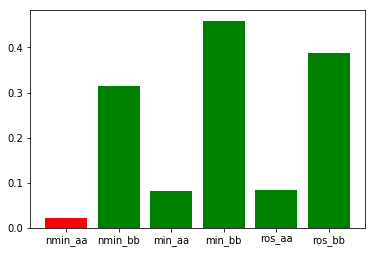

In [11]:
plot_chart(test["orig_average"])

In [12]:
test["orig_average"] #percentage

{'nmin_aa': 0.022791245404411766,
 'nmin_bb': 0.3148408777573529,
 'min_aa': 0.08239028033088236,
 'min_bb': 0.45885512408088236,
 'ros_aa': 0.083984375,
 'ros_bb': 0.38650333180147056}

### Test subset (length <= 9): average value for each column

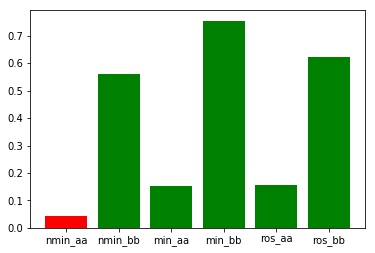

In [13]:
plot_chart(test["nine_dim_average"]) 

In [14]:
test["nine_dim_average"] #percentage

{'nmin_aa': 0.04428998161764706,
 'nmin_bb': 0.5605755974264706,
 'min_aa': 0.15265969669117646,
 'min_bb': 0.7545668658088235,
 'ros_aa': 0.15576171875,
 'ros_bb': 0.6235064338235294}

### Train subset

In [15]:
train["orig_df"].style.applymap(_color_frame, subset=a.columns[0::2])

,complex,length,nmin_aa,nmin_bb,min_aa,min_bb,ros_aa,ros_bb
0,3jtt_YTSGPGIRY,9,0,0.0461426,0,0.0551758,0,0.0490723
1,1kjv_NPRAMQALL,9,0,0.211182,0,0.510742,0,0.479248
2,3mgt_LLFGKPVYV,9,0,0.253418,0.0380859,0.603271,0.036377,0.491699
3,3wlb_RYGFVANF,8,0.00634766,0.927002,0.117676,0.949463,0.156738,0.86084
4,4hx1_SVYDFFVWL,9,0,0.0749512,0,0.340332,0,0.373047
5,1bz9_FAPGVFPYM,9,0.000244141,0.09375,0.248779,0.855225,0.197266,0.651611
6,3bwa_EPLPQGQLTAY,11,0,0.107666,0.00170898,0.208496,0.00317383,0.188721
7,3bp7_RRKWRRWHL,9,0,0.461914,0,0.499756,0,0.325684
8,1jpg_KAVFNFATM,9,0,0.0358887,0.00146484,0.371094,0.00219727,0.248047
9,1xr8_VQQESSFVM,9,0.000244141,0.650635,0.0266113,0.76709,0.0180664,0.525146


### Train subset (length <= 9)

In [16]:
train["nine_dim_df"].style.applymap(_color_frame, subset=a.columns[0::2])

,complex,length,nmin_aa,nmin_bb,min_aa,min_bb,ros_aa,ros_bb
0,3jtt_YTSGPGIRY,9,0,0.0461426,0,0.0551758,0,0.0490723
1,1kjv_NPRAMQALL,9,0,0.211182,0,0.510742,0,0.479248
2,3mgt_LLFGKPVYV,9,0,0.253418,0.0380859,0.603271,0.036377,0.491699
3,3wlb_RYGFVANF,8,0.00634766,0.927002,0.117676,0.949463,0.156738,0.86084
4,4hx1_SVYDFFVWL,9,0,0.0749512,0,0.340332,0,0.373047
5,1bz9_FAPGVFPYM,9,0.000244141,0.09375,0.248779,0.855225,0.197266,0.651611
7,3bp7_RRKWRRWHL,9,0,0.461914,0,0.499756,0,0.325684
8,1jpg_KAVFNFATM,9,0,0.0358887,0.00146484,0.371094,0.00219727,0.248047
9,1xr8_VQQESSFVM,9,0.000244141,0.650635,0.0266113,0.76709,0.0180664,0.525146
10,3qq3_NSDTVGWSW,9,0.000244141,0.490967,0.0136719,0.859863,0.00268555,0.57959


### Train subset: average value for each column

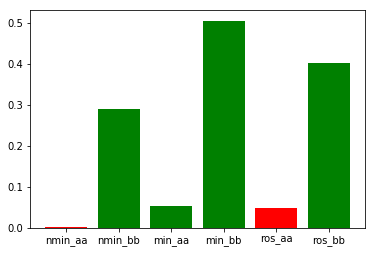

In [17]:
plot_chart(train["orig_average"])

In [19]:
train["orig_average"]

{'nmin_aa': 0.0027810801630434785,
 'nmin_bb': 0.2883406929347826,
 'min_aa': 0.05307404891304348,
 'min_bb': 0.5042034646739131,
 'ros_aa': 0.04863705842391304,
 'ros_bb': 0.4005073879076087}

### Train subset (length <= 9): average value for each column

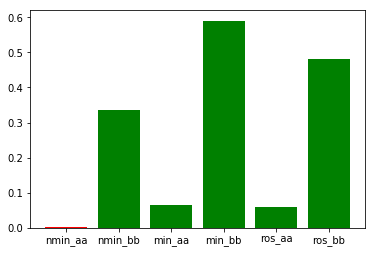

In [18]:
plot_chart(train["nine_dim_average"])

In [20]:
train["nine_dim_average"]

{'nmin_aa': 0.0031602647569444445,
 'nmin_bb': 0.3363715277777778,
 'min_aa': 0.06486002604166667,
 'min_bb': 0.5899929470486112,
 'ros_aa': 0.05995008680555555,
 'ros_bb': 0.4820827907986111}